<a href="https://colab.research.google.com/github/GarimaChopra/AML/blob/main/Project4_Customer_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Satisfaction dataset**,  the training/testing sets include data about customers that are grouped into 4 segments (classes A, B, C, D)  based on a number of categoric and numeric attributes such as gender, age, profession, work experience, etc. 

In [399]:
# Using Pandas for importing data from file 
import pandas as pd

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using numpy for to operate on multidimentional arrays.
import numpy as np

In [400]:
# Read raw file from github into a dataframe

df_train= pd.read_csv('https://raw.githubusercontent.com/GarimaChopra/AML/main/CS_Train.csv')
df_test=pd.read_csv('https://raw.githubusercontent.com/GarimaChopra/AML/main/CS_Test.csv')

#verify if data is loaded
print(df_train.shape,df_test.shape)

(8068, 11) (2627, 11)


In [401]:
# view dataset
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [402]:
#summarize the data set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


**Problem Statement:** 

1)Perform a preliminary analysis on the dataset to determine which attributes have the highest correlation with the target variable. Use graphs to visualize the results.

2)Create pipelines to handle missing data values, scaling issues, and encoding (imputers, scalers, encoders for categoric features) as necessary.

In [403]:
# drop non-essential columns
df_train.drop(['ID','Var_1'], axis=1, inplace=True)
df_test.drop(['ID','Var_1'], axis=1, inplace=True)



In [404]:
# Check to see if there are any missing values
df_train.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

From the analysis above, we find out that the columns that require imputation are as follows: Ever_Married, Graduated, Profession, Work_Experience, Family_Size

In [405]:
df_train.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Segmentation        object
dtype: object

In [410]:
# Split target from features and drop unnecessary columns

X_train = df_train.drop(['Segmentation'], axis=1)
Y_train = df_train['Segmentation']
X_test = df_test.drop(['Segmentation'], axis=1)
Y_test = df_test['Segmentation']


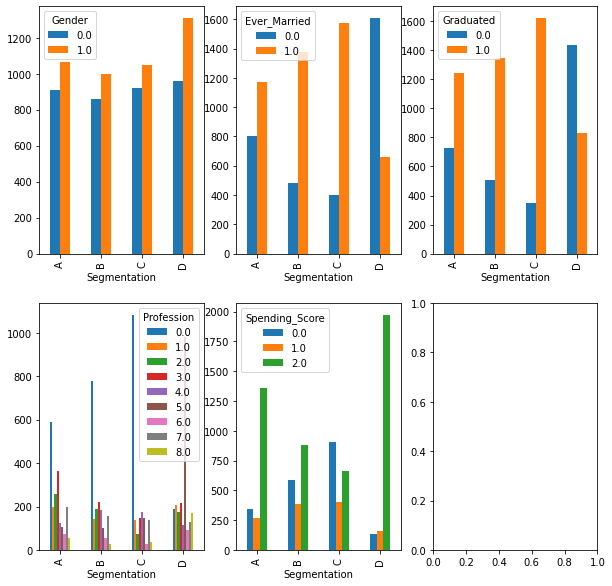

In [439]:
X_cat =X_train.drop(columns = ['Age','Work_Experience','Family_Size']) #dropping numeric cols

figure, axes = plt.subplots(2, 3, figsize=(10, 10))

# function to help display subplots 

classIndex = 0;

for row in range(3):
  for col in range(3):
    if classIndex == 5: 
      break
    ct1 = pd.crosstab(Y_train[:], X_cat[X_cat.columns[classIndex]])
    ct1.plot.bar(ax = axes[row][col])
    classIndex += 1
    

plt.show()



**Ever_married/ segmentation**: segment A,B,C favour married while segment D favours unmarried

**Graduate/ segmentation**: segment A,B,C favour graduates  while segment D favours  non graduates

**Spending_Score/ segmentation**: segment A and D favour low spenders, (almost 3 times other in segment D)

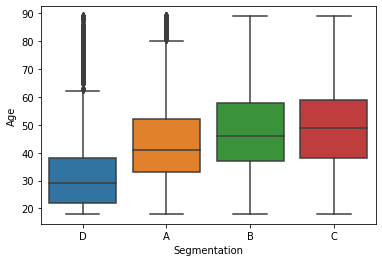

In [407]:
ax = sns.boxplot(x='Segmentation', y='Age', data=df_train)


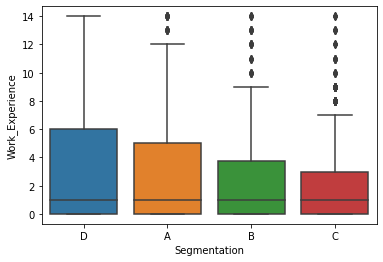

In [408]:
ax = sns.boxplot(x='Segmentation', y='Work_Experience', data=df_train)

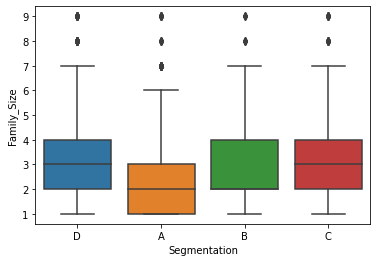

In [409]:
ax = sns.boxplot(x='Segmentation', y='Family_Size', data=df_train)


Age and Family size appear to be correlated to segmentation

To get peason correlation we need to do some preprocessing on input data as correlation doesnt work on categorical data


In [411]:
# function for prelim processing of Categorical data and numerical data
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler


def prelim_process_cat (column):
  
  # replace missing values with most frequently occuring using imputer 
  imputer = SimpleImputer(strategy='most_frequent')
  imputer.fit(column)
  imputed_data = imputer.transform(column)
  
  #  encode categorical values
  encoder = OrdinalEncoder()
  encoder.fit(imputed_data)
  return encoder.transform(imputed_data)

def prelim_process_num (column):
  
  # replace missing values with most frequently occuring using imputer 
  imputer = SimpleImputer(strategy='most_frequent')
  imputer.fit(column)
  return imputer.transform(column)
  

In [412]:
# Categorical Values
cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Segmentation'];

# for each categorical col,impute and encode
for col in cat_cols:
  df_train[col] = prelim_process_cat(pd.DataFrame(df_train[col]))

In [413]:
#Impute Numerical values 

num_cols=['Age','Work_Experience','Family_Size']

# for each numerical col,impute 
for col in num_cols:
  df_train[col] = prelim_process_num(pd.DataFrame(df_train[col]))

In [414]:
df_train.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000
mean,0.547471,0.592836,43.466906,0.625434,2.746901,2.472980,1.359941,2.814824,1.561973
std,0.497772,0.491336,16.711696,0.484041,2.541418,3.265248,0.848418,1.508841,1.139029
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,40.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,2.000000,4.000000,3.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


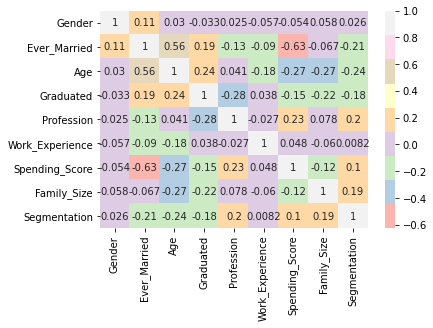

In [415]:
#Correlation

g = sns.heatmap(df_train[["Gender", "Ever_Married", "Age", "Graduated", "Profession", "Work_Experience", "Spending_Score", "Family_Size", "Segmentation"]].corr(),
                annot=True, 
                cmap = "Pastel1")

From above heatmap we infer that Profession, Family size are also strongly correlated to target and the corelation is positive.
Customer age also has strong correlation to target class (segmentation) and the corelation is inverse meaning lower the age, the more likely to be classified as a particular class.



### Creating Pipelines

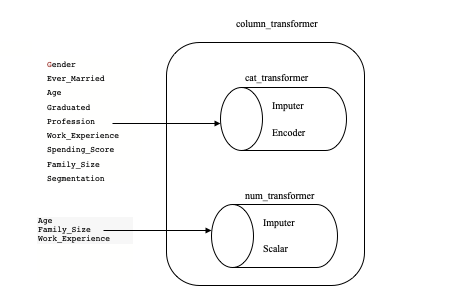

ColumnTransformer allows us to specify which pipeline will be applied to which column.

By default imputers or transformers apply to the entire dataset, but we often prefer to have finer control over categorical and numerical columns.

The combination of Pipeline and ColumnTransformer is powerful.

In [416]:
# Columntransformer for preprocessing 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


#pipeline for the categoric attributes

cat_cols = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score"]

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])



# pipeline for the numeric attributes
num_cols = ['Age', 'Family_Size', 'Work_Experience']

num_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])


#applying column transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

**Problem Statement :** Create pipelines to obtain classification accuracy measures for SVC (linear, poly, RBF) and DecisionTreeClassifier (gini, entropy) models

In [417]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

num_folds = 10

########## A decicion tree with gini
gini_dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='gini'))])

gini_dt_score = cross_val_score(gini_dt_clf, X_train, Y_train, cv=num_folds, scoring="accuracy").mean()


########## A decicion tree with entropy
entropy_dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='entropy'))])

entropy_dt_score = cross_val_score(entropy_dt_clf, X_train, Y_train, cv=num_folds, scoring="accuracy").mean()


########## An RBF kernel classifier
rbf_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='rbf'))])

rbf_svc_clf_score = cross_val_score(rbf_svc_clf, X_train, Y_train, cv=num_folds, scoring="accuracy").mean()


########## A poly kernel classifier
poly_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='poly'))])

poly_svc_clf_score = cross_val_score(poly_svc_clf, X_train, Y_train, cv=num_folds, scoring="accuracy").mean()

########## A linear kernel classifier
linear_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='linear'))])

linear_svc_clf_score = cross_val_score(linear_svc_clf, X_train, Y_train, cv=num_folds, scoring="accuracy").mean()

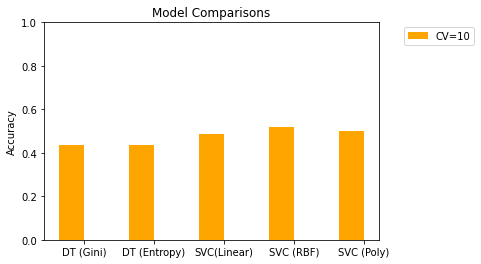

In [418]:
# Summarize the findings for all models

labels = ['DT (Gini)', 'DT (Entropy)', 'SVC(Linear)', 'SVC (RBF)', 'SVC (Poly)']
training_scores = [gini_dt_score, entropy_dt_score, linear_svc_clf_score, rbf_svc_clf_score, poly_svc_clf_score]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='CV=10', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()

|--- Gender <= -0.57
|   |--- Gender <= -1.16
|   |   |--- Spending_Score <= 4.50
|   |   |   |--- truncated branch of depth 14
|   |   |--- Spending_Score >  4.50
|   |   |   |--- truncated branch of depth 14
|   |--- Gender >  -1.16
|   |   |--- Spending_Score <= 4.50
|   |   |   |--- truncated branch of depth 22
|   |   |--- Spending_Score >  4.50
|   |   |   |--- truncated branch of depth 21
|--- Gender >  -0.57
|   |--- Family_Size <= 1.50
|   |   |--- Work_Experience <= 0.50
|   |   |   |--- truncated branch of depth 20
|   |   |--- Work_Experience >  0.50
|   |   |   |--- truncated branch of depth 25
|   |--- Family_Size >  1.50
|   |   |--- Spending_Score <= 1.50
|   |   |   |--- truncated branch of depth 20
|   |   |--- Spending_Score >  1.50
|   |   |   |--- truncated branch of depth 21



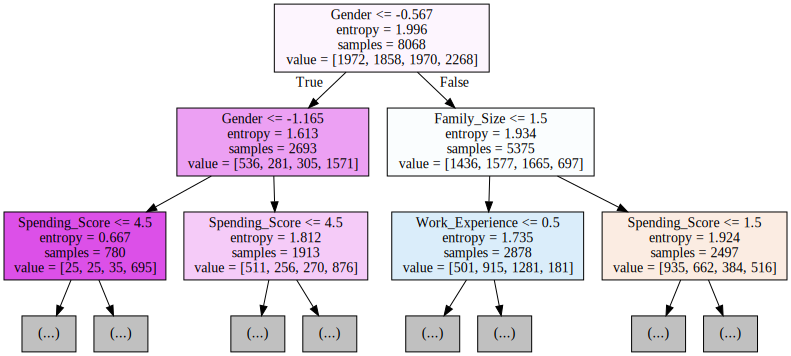

In [419]:
# Convert the decision tree model to text and graph

from matplotlib import pyplot
from sklearn.tree import export_text, export_graphviz
import graphviz


# the DT model is refit to the entire dataset
tree_X = df_train.copy(deep=True)
tree_y = df_train["Segmentation"]

# drop target and non-essential columns
tree_X.drop(['Segmentation'], axis=1, inplace=True)


# we need to refit the DT model that is part of a composite pipe before exporting it as text
entropy_dt_clf['classifier'].fit(preprocessor.fit_transform(tree_X), tree_y)


# display the induced decision tree as a series of logical rules
text_representation = export_text(entropy_dt_clf['classifier'],
                                  feature_names=[ "Gender","Ever_Married","Age", "Graduated","Profession" ,"Work_Experience","Spending_Score","Family_Size" ],
                                  max_depth=2)
print(text_representation)


# draw the induced decision tree
dot_data = export_graphviz(entropy_dt_clf['classifier'],
                                  max_depth=2,
                                  feature_names=["Gender","Ever_Married","Age", "Graduated","Profession" ,"Work_Experience","Spending_Score","Family_Size" ],
                                  filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph




In [420]:
df_train.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000
mean,0.547471,0.592836,43.466906,0.625434,2.746901,2.472980,1.359941,2.814824,1.561973
std,0.497772,0.491336,16.711696,0.484041,2.541418,3.265248,0.848418,1.508841,1.139029
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,40.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,2.000000,4.000000,3.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


Feature: 0, Score: 0.40845
Feature: 1, Score: 0.11392
Feature: 2, Score: 0.17692
Feature: 3, Score: 0.04924
Feature: 4, Score: 0.02499
Feature: 5, Score: 0.04118
Feature: 6, Score: 0.11944
Feature: 7, Score: 0.06586


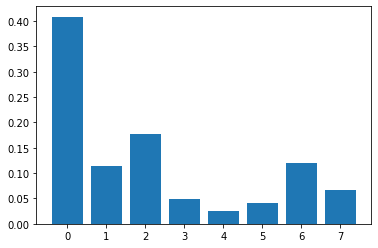

In [421]:
# get feature importances from the model
importance = entropy_dt_clf['classifier'].feature_importances_

# summarize feature importances
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# plot feature importances
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

**Problem Statement**:Plot the obtained accuracy values for each model before and after hyperparameter parameters of your choice have been optimized using GridSearchCV.

In [435]:
# Use GridSearchCV to find optimum hyperparameter values for the DT model

# create a dictionary of all values we want to test
param_grid1 = { 'criterion':['gini','entropy'],    # impurity criterion
              'max_depth': np.arange(3, 15)}      # tree depth 
   
    
# use gridsearch to test all values
grid_search1 = GridSearchCV(entropy_dt_clf['classifier'], 
                           param_grid1, 
                           cv=3)
    
# fit the model 
grid_search1.fit(preprocessor.fit_transform(X_train), Y_train)

   
print("For DT, the best achieved accuracy after hyperparameter optimization: %.2f \n" % (grid_search1.best_score_))

print("The best DT model hyperparameters:", grid_search1.best_params_)

For DT, the best achieved accuracy after hyperparameter optimization: 0.52 

The best DT model hyperparameters: {'criterion': 'gini', 'max_depth': 5}


In [436]:
# Use GridSearchCV to find optimum hyperparameter values for the DT model

# create a dictionary of all values we want to test
param_grid2 = { 'kernel':['rbf','linear', 'poly'],    # kernel
                'decision_function_shape': ['ovo', 'ovr'], # decision function (choose between ovo, one verus one, and ovr, one versus rest)
                 'C' : np.arange(1, 3),
                 'degree': np.arange(1,3)
               } 
   
    
# use gridsearch to test all values
grid_search2 = GridSearchCV(rbf_svc_clf['classifier'], 
                           param_grid2, 
                           cv=3)
    
# fit the model 
grid_search2.fit(preprocessor.fit_transform(X_train), Y_train)

   
print("For SVC, the best achieved accuracy after hyperparameter optimization: %.2f \n" % (grid_search2.best_score_))

print("The best SVC model hyperparameters:", grid_search2.best_params_)

For SVC, the best achieved accuracy after hyperparameter optimization: 0.52 

The best SVC model hyperparameters: {'C': 1, 'decision_function_shape': 'ovo', 'degree': 1, 'kernel': 'rbf'}


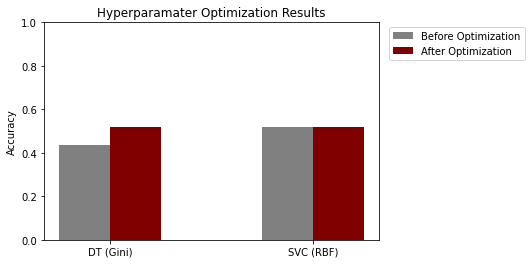

In [437]:
# graph results of grid search for the two models

labels = ['DT (Gini)', 'SVC (RBF)']
before_optimization_scores = [gini_dt_score, rbf_svc_clf_score]
after_optimization_scores = [grid_search1.best_score_, grid_search2.best_score_]

x = np.arange(len(labels))  # the label locations
width = 0.25                # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_optimization_scores, width, label='Before Optimization', color='gray')
rects2 = ax.bar(x + width/2, after_optimization_scores, width, label='After Optimization', color='maroon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1.0)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.45, 1.0), loc='upper right')

plt.title('Hyperparamater Optimization Results')
plt.show()

### **Summary**
In this exercise, the following functionalities were used on the Titanic dataset:

1.   pipelines to impute and prepare data
2.   pipelines to perform classification
1.   converting decision trees to text and graph
2.   performing grid search to optimize a few hyperparameters